In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def diagrams(df, column):
    good_apples = df[df["Quality"] == "good"]
    bad_apples = df[df["Quality"] == "bad"]
    plt.figure(figsize=(30, 6))
    plt.hist(good_apples[column], bins=50, edgecolor='black', alpha=0.5, color='green', label='Хорошие яблоки')
    plt.hist(bad_apples[column], bins=50, edgecolor='black', alpha=0.5, color='red', label='Плохие яблоки')
    plt.xlabel(f"{column} яблок")
    plt.ylabel("Количество")
    plt.title(f"Сравнение распределения {column} хороших и плохих яблок")
    plt.legend()
    plt.show()


def graphics(good_apples, column1, column2):
    good_apples.loc[:,"A_id"] = good_apples.index
    plt.figure(figsize=(30, 7))
    plt.plot(good_apples["A_id"], good_apples[column1], marker='o', linewidth=3, markersize=1, linestyle='-', color='green', label=column1)
    plt.plot(good_apples["A_id"], good_apples[column2], marker='o', linewidth=3, markersize=1, linestyle='-', color='red', alpha=0.5, label=column2)
    plt.xlabel("Порядковый номер яблока (ID)")
    plt.title("Сравнение двух показетелей от ID яблока")
    plt.grid(True)
    plt.legend()
    plt.show()


data_fruit = pd.read_csv("quotes2.csv")
data_fruit = data_fruit[data_fruit["Quality"].notna()]
#data_fruit = data_fruit[(data_fruit["Size"] > 0) & (data_fruit["Weight"] > 0)]
data_fruit['Acidity'] = data_fruit['Acidity'].astype(float).round(6)
good_apples = data_fruit[(data_fruit["Quality"] == "good")]
bad_apples = data_fruit[(data_fruit["Quality"] == "bad")]
columns_names = data_fruit.columns

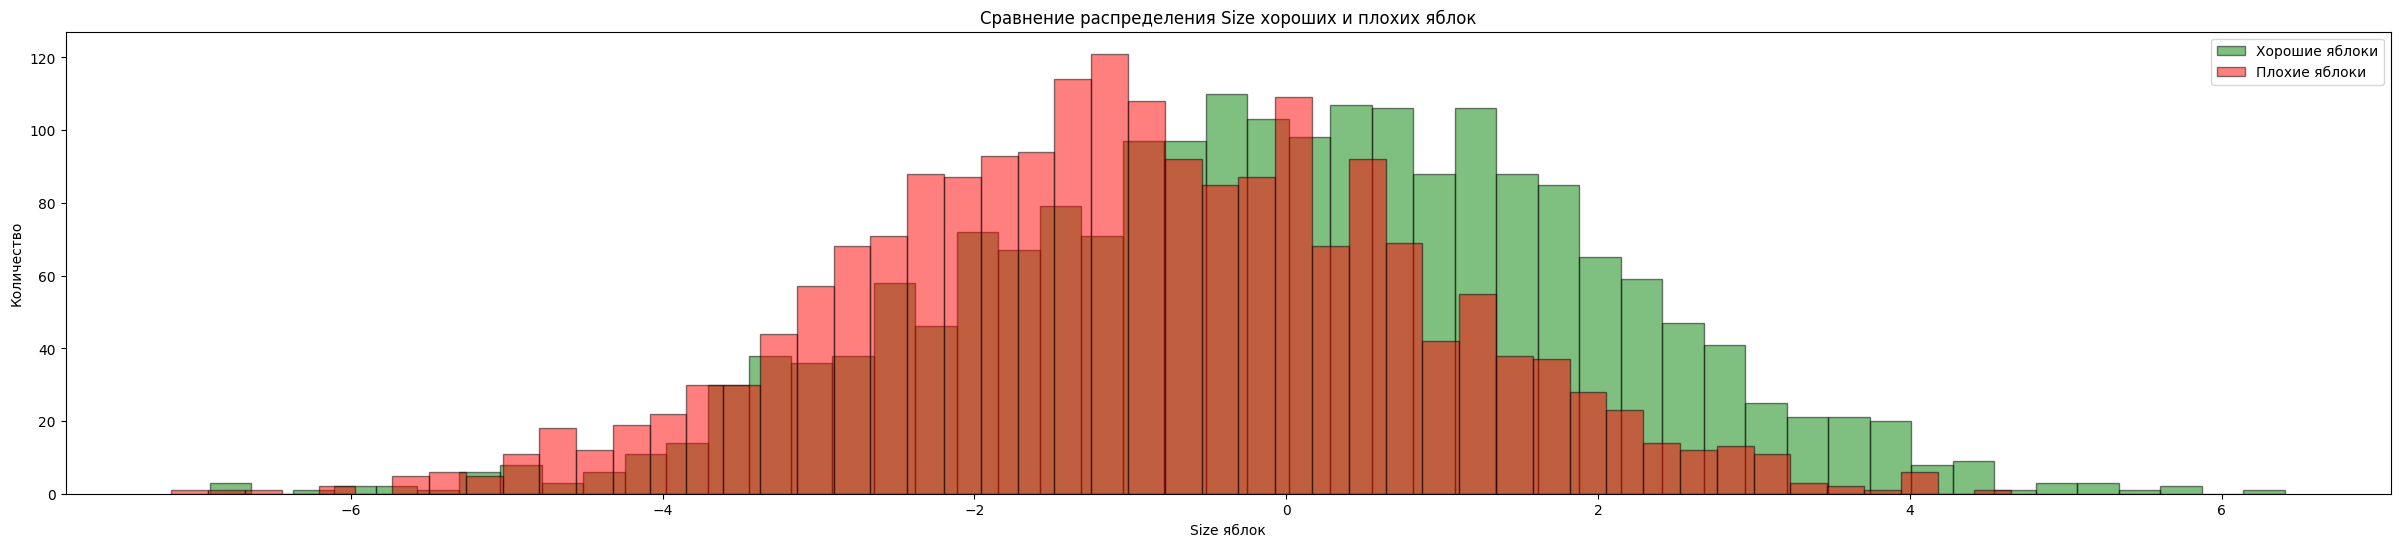

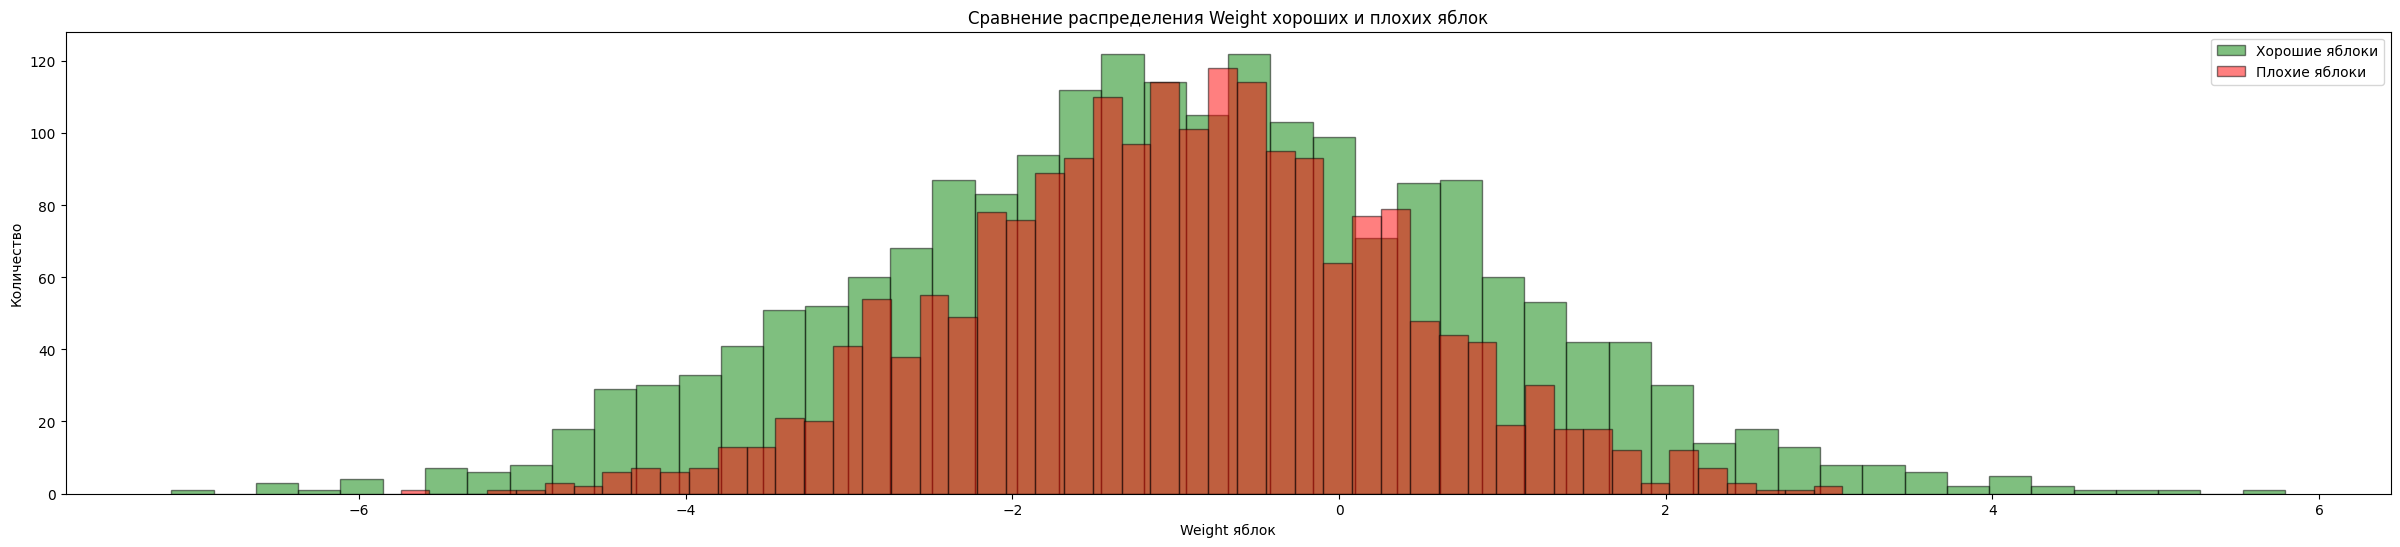

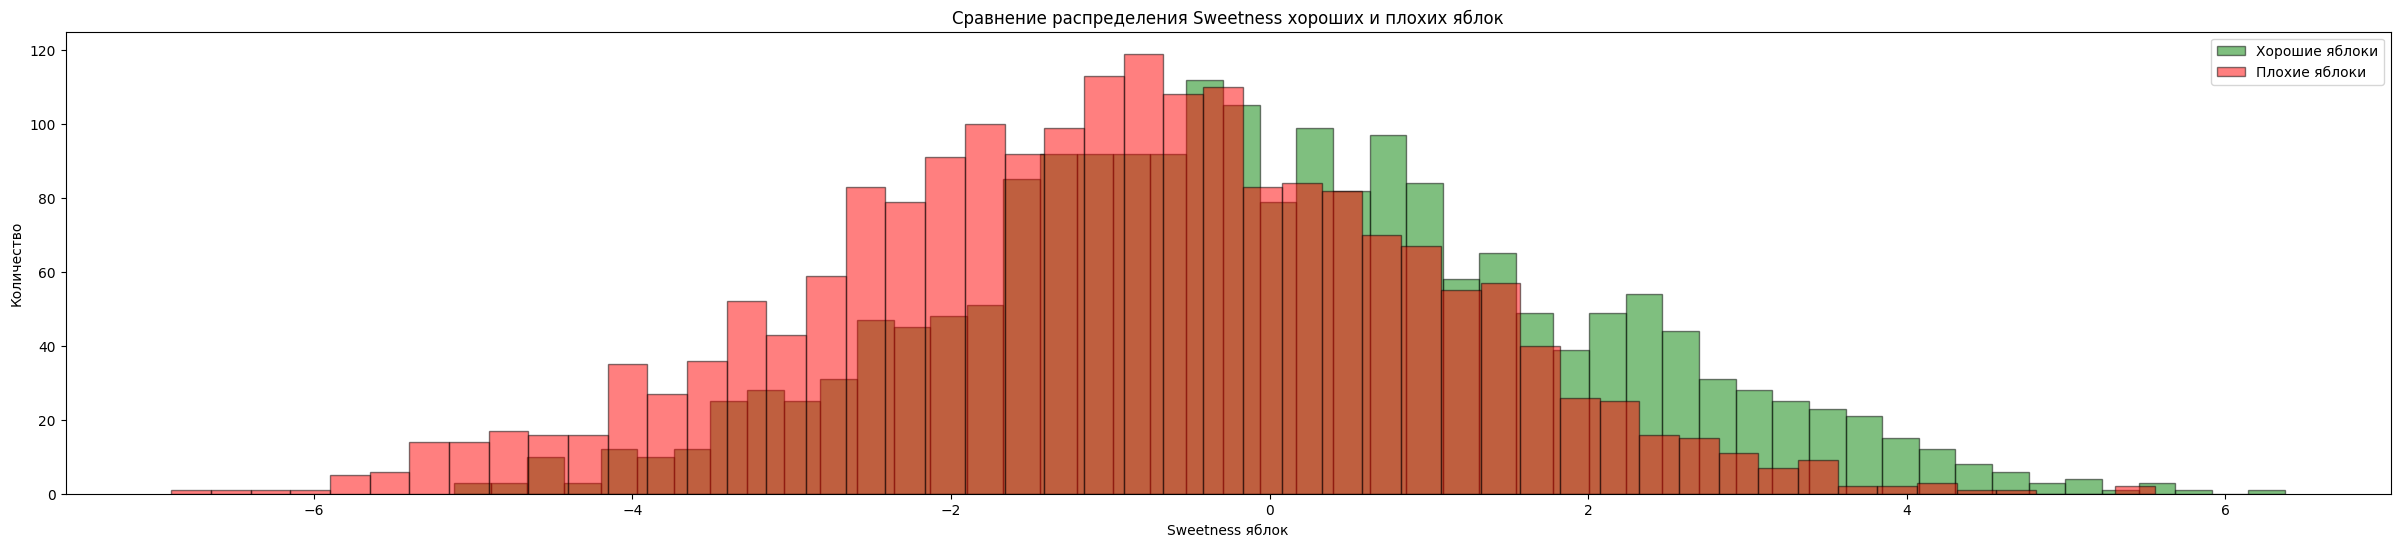

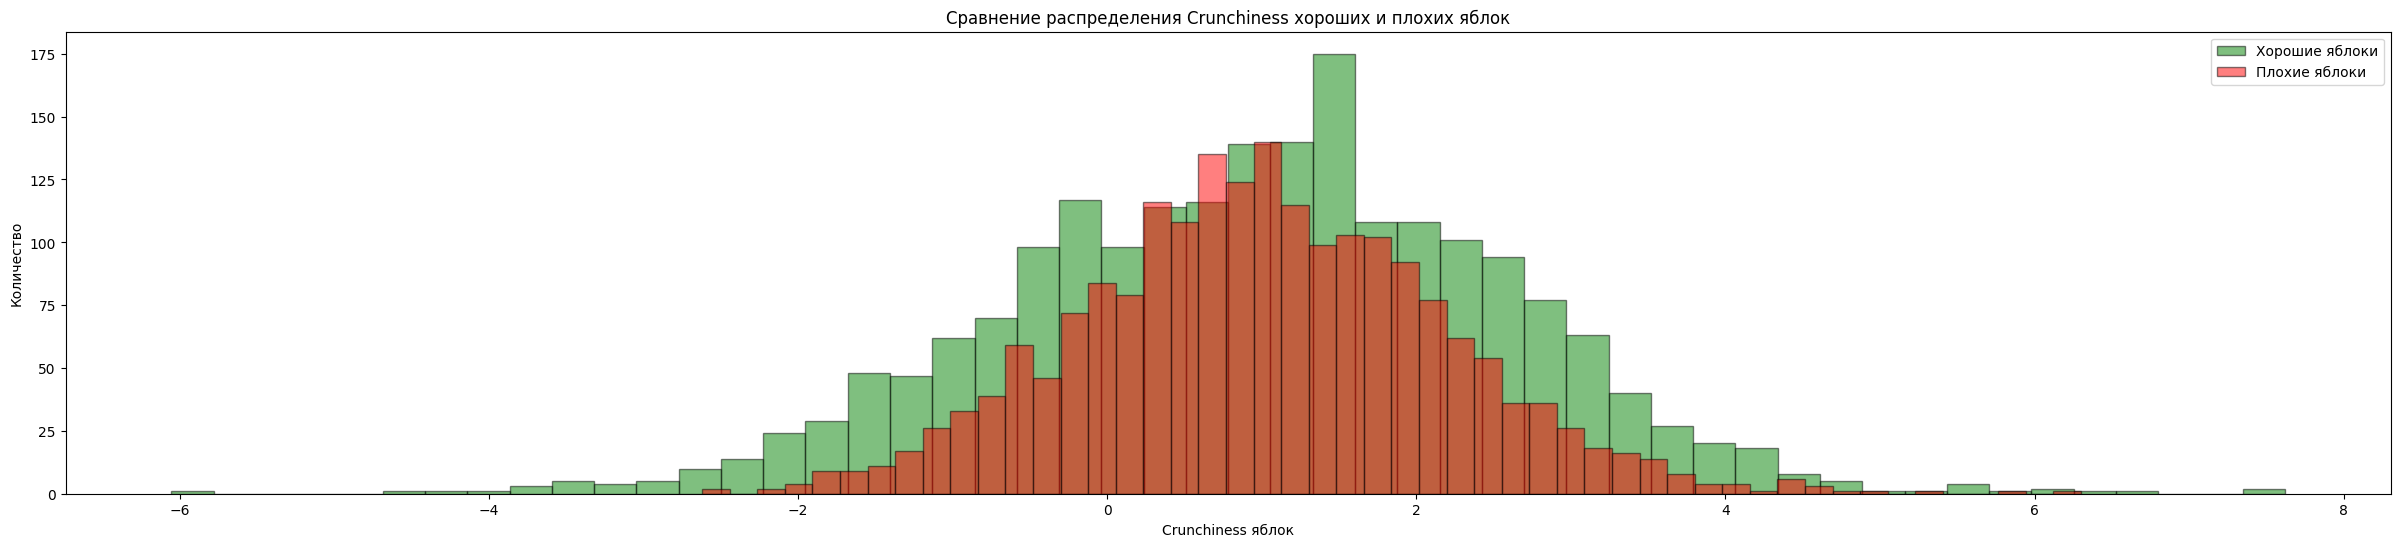

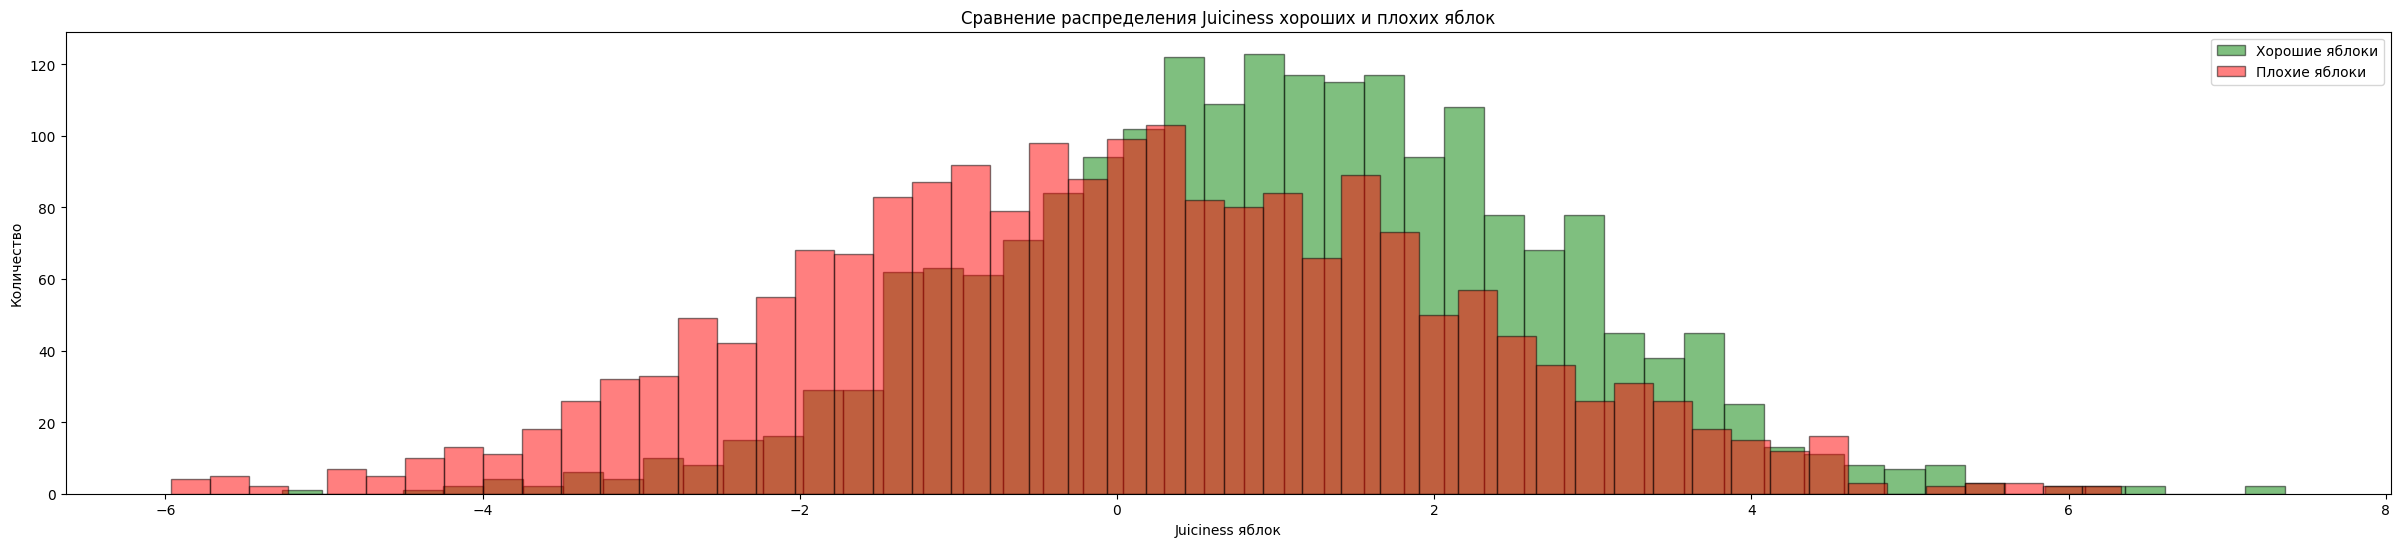

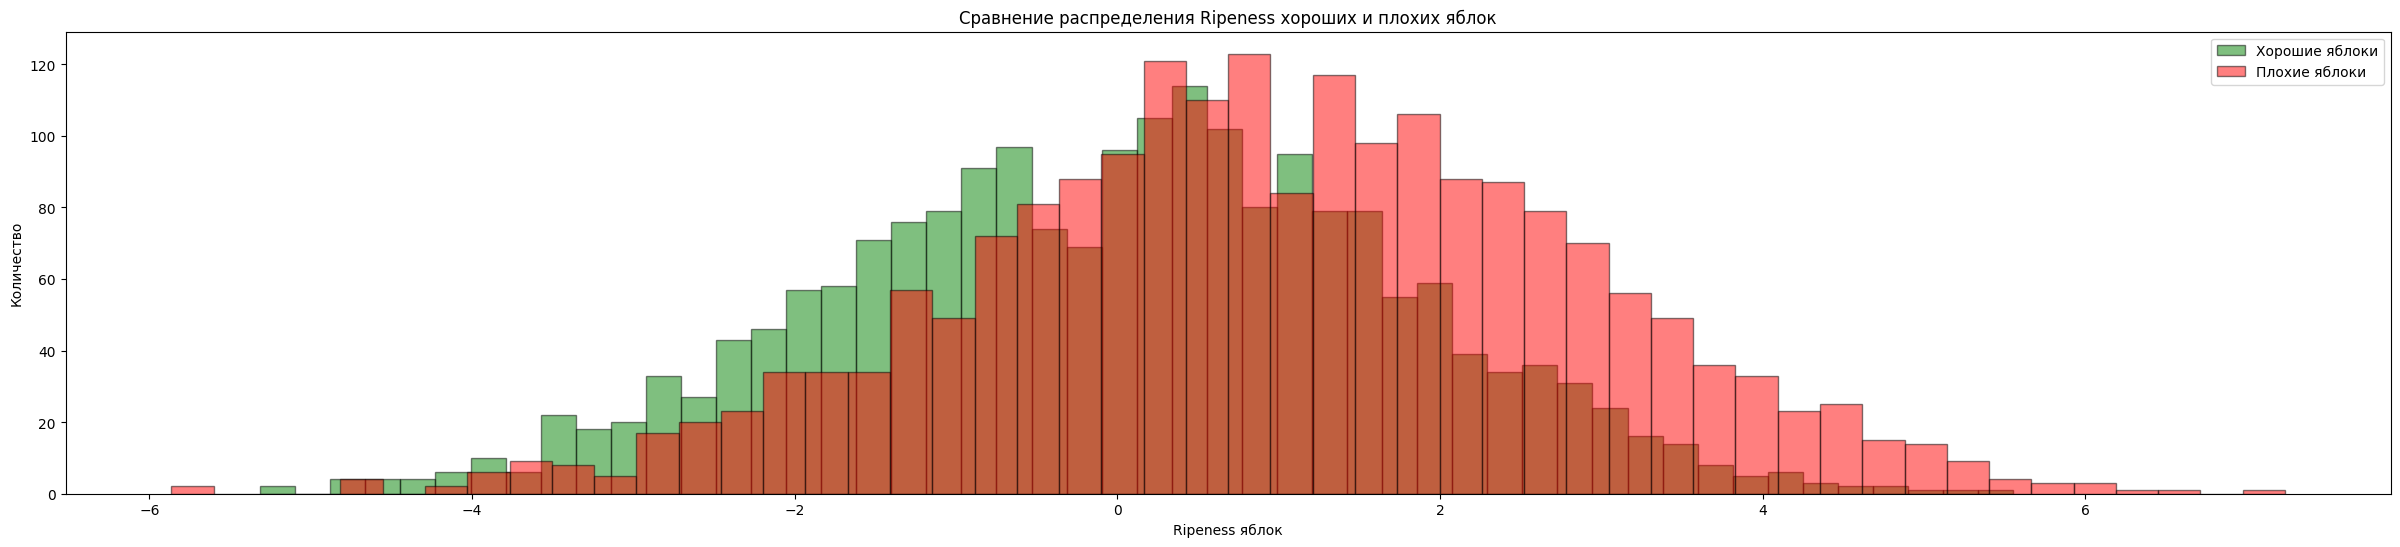

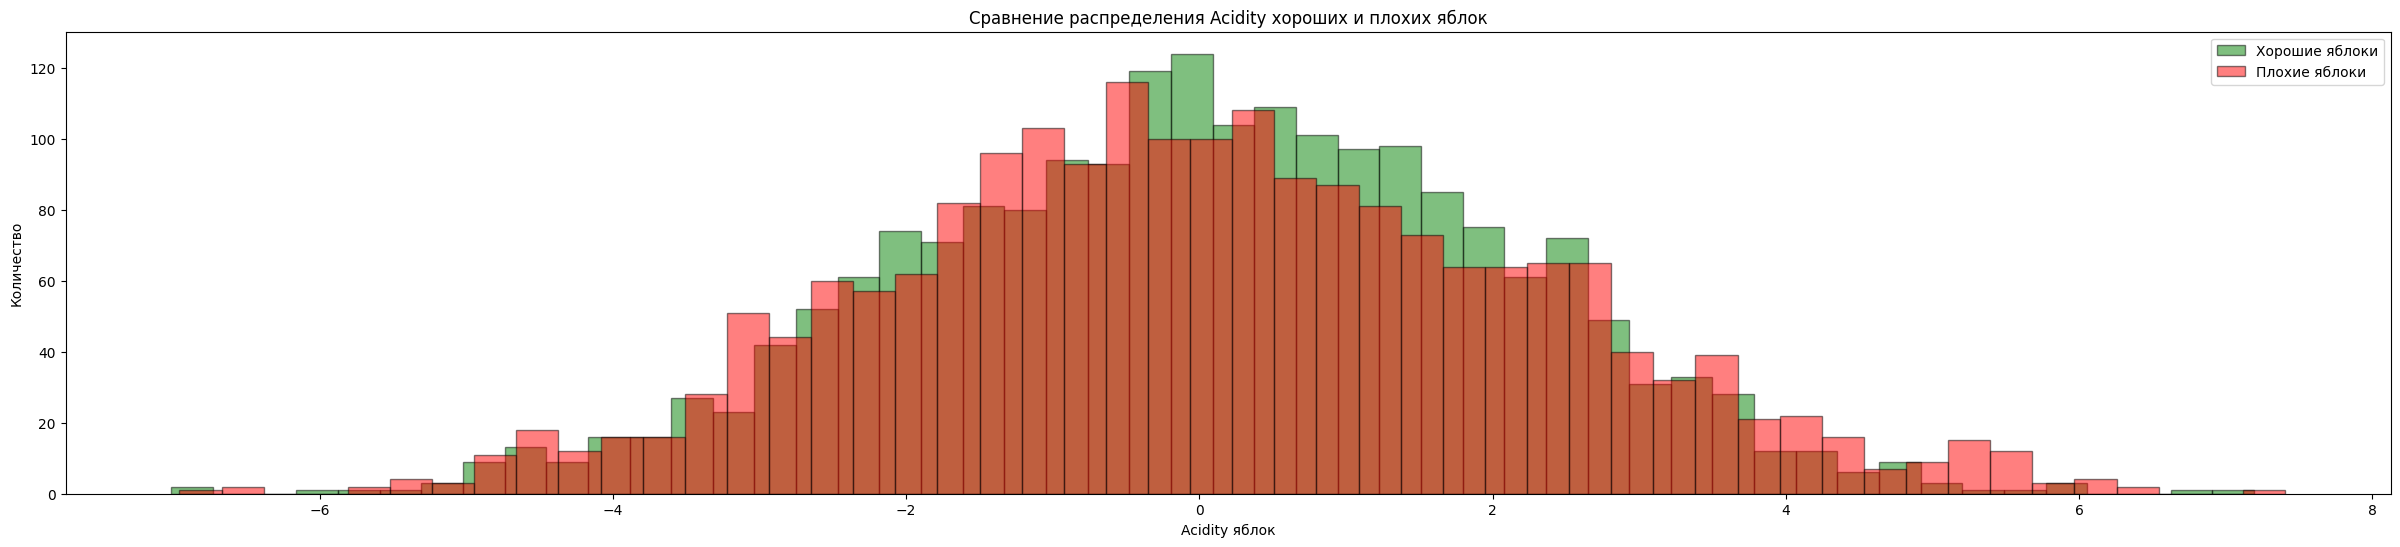

'\n1) Здесь видно, что размер хороших яблок больше, чем у плохих. То есть можем сформировать мнение, что большие яблоки больше нравятся людям.\n2) Большой вес яблок также для людей означает превосходство над легкими. Можно сказать что качество яблок прямопропорционально его размерам и весу.\nможем сказать, что над физическими показателями фруктов мы поработали\n3) На третьем графике видим, что "Сладкость" яблок пропорциональна качеству. Слишком кислые - плохие, в середине одинаково, а правее в сторону более\nсладких видим зеленые столбцы. Лично мне нравится золотая середина, потому что как правило очень сладкие яблоки слишком мягкие, толком не похрустишь.\n4) Как раз переходим к хрусткости продукта. Таких людей как я оказывается много, и им тоже нравятся жесткие яблоки. Слишком мягкие, я думаю,\nнравятся пожилым людям, так как их легче жевать. Также зависит от сорта яблок. Некоторые яблоки и вправду вкуснее когда мягкие\n5) Сочность. Тут всё довольно очевидно, что это тоже прямопорцион

In [13]:
for column in columns_names[1:-1]:
    diagrams(data_fruit, str(column))
"""
1) Здесь видно, что размер хороших яблок больше, чем у плохих. То есть можем сформировать мнение, что большие яблоки больше нравятся людям.
2) Большой вес яблок также для людей означает превосходство над легкими. Можно сказать что качество яблок прямопропорционально его размерам и весу.
можем сказать, что над физическими показателями фруктов мы поработали
3) На третьем графике видим, что "Сладкость" яблок пропорциональна качеству. Слишком кислые - плохие, в середине одинаково, а правее в сторону более
сладких видим зеленые столбцы. Лично мне нравится золотая середина, потому что как правило очень сладкие яблоки слишком мягкие, толком не похрустишь.
4) Как раз переходим к хрусткости продукта. Таких людей как я оказывается много, и им тоже нравятся жесткие яблоки. Слишком мягкие, я думаю,
нравятся пожилым людям, так как их легче жевать. Также зависит от сорта яблок. Некоторые яблоки и вправду вкуснее когда мягкие
5) Сочность. Тут всё довольно очевидно, что это тоже прямопорционально оценке общего качества фрукта.
6) Зрелость. Все что больше 1, скорее всего считается переспелым, так как там больше плохих. Переспелые фрукты тоже не очень хорошо. Далее от 0 до -4
мы видим превосходство хороших яблок. и после четырех опять появляются преимущественно красные. Там скорее всего совсем непоспевшие плоды,
которые мы ели в детстве в июне, как только видели зеленые плоды на деревьях.
7) Уровень кислотности продукта из диаграммы назвать сложно, всё впритирку.
"""

In [33]:
data_fruit['Size_category'] = 0
data_fruit.loc[(data_fruit['Size'] > 0.0) & (data_fruit['Size'] < 1.0), 'Size_category'] = 1
data_fruit.loc[(data_fruit['Size'] >= 1.0) & (data_fruit['Size'] < 2.5), 'Size_category'] = 2
data_fruit.loc[(data_fruit['Size'] >= 2.5) & (data_fruit['Size'] < 3.3), 'Size_category'] = 3
data_fruit.loc[(data_fruit['Size'] >= 3.3) & (data_fruit['Size'] < 6.0), 'Size_category'] = 4

In [34]:
data_fruit['Weight_category'] = 0
data_fruit.loc[(data_fruit['Weight'] > 0.0) & (data_fruit['Weight'] < 1.0), 'Weight_category'] = 1
data_fruit.loc[(data_fruit['Weight'] >= 1.0) & (data_fruit['Weight'] < 2.4), 'Weight_category'] = 2
data_fruit.loc[(data_fruit['Weight'] >= 2.4) & (data_fruit['Weight'] < 5.0), 'Weight_category'] = 3

In [35]:
data_fruit['Sweetness_category'] = 0
data_fruit.loc[(data_fruit['Sweetness'] >= -4.0) & (data_fruit['Sweetness'] < -2.0), 'Sweetness_category'] = 1
data_fruit.loc[(data_fruit['Sweetness'] >= -2.0) & (data_fruit['Sweetness'] < 0.0), 'Sweetness_category'] = 2
data_fruit.loc[(data_fruit['Sweetness'] >= 0.0) & (data_fruit['Sweetness'] < 2.0) | (data_fruit['Sweetness'] > -6.0) & (data_fruit['Sweetness'] < -4.0) , 'Sweetness_category'] = 3
data_fruit.loc[(data_fruit['Sweetness'] >= 2.2), 'Sweetness_category'] = 4

In [36]:
data_fruit['Crunchiness_category'] = 0
data_fruit.loc[(data_fruit['Crunchiness'] >= 0.0) & (data_fruit['Crunchiness'] < 3.0), 'Crunchiness_category'] = 1
data_fruit.loc[((data_fruit['Crunchiness'] >= -1.4) & (data_fruit['Crunchiness'] < 0.0)) | (data_fruit['Crunchiness'] >= 3.0), 'Crunchiness_category'] = 2
data_fruit.loc[(data_fruit['Crunchiness'] < -1.4), 'Crunchiness_category'] = 3

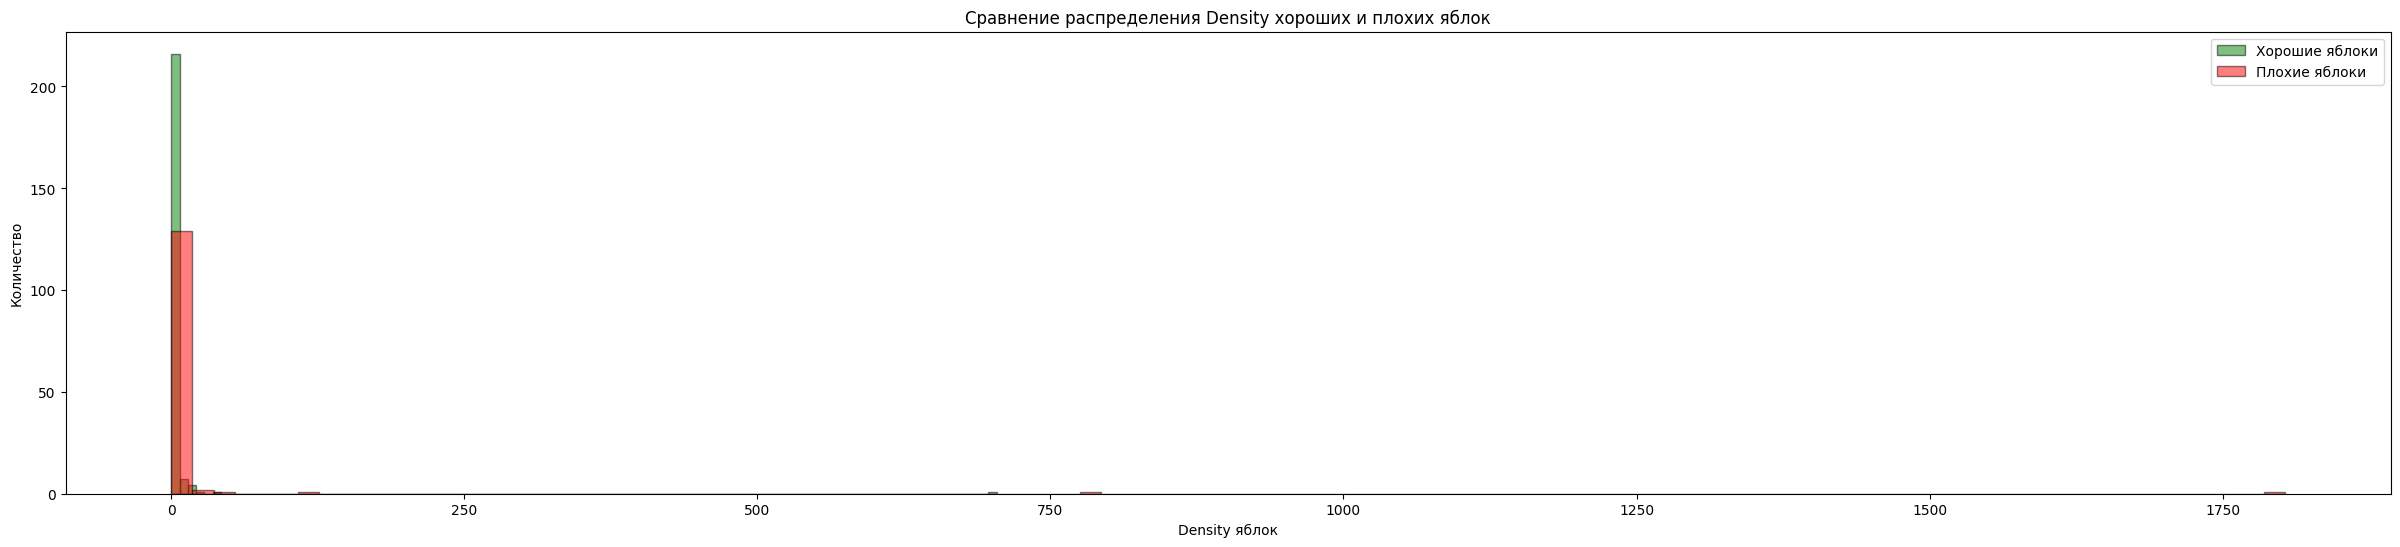

In [37]:
data_fruit['Density'] = data_fruit['Weight'] / data_fruit['Size']
diagrams(data_fruit, 'Density')

In [38]:
minmax_scaler = MinMaxScaler()
data_fruit['juiciness_scaled'] = minmax_scaler.fit_transform(data_fruit[['Juiciness']])
data_fruit['ripeness_scaled'] = minmax_scaler.fit_transform(data_fruit[['Ripeness']])
data_fruit['acidity_scaled'] = minmax_scaler.fit_transform(data_fruit[['Acidity']])

In [42]:
print(data_fruit.columns)

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality', 'Size_category', 'Weight_category',
       'Sweetness_category', 'Crunchiness_category', 'Density',
       'juiciness_scaled', 'ripeness_scaled', 'acidity_scaled'],
      dtype='object')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('quotes2.csv')



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [7]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('quotes2.csv')
df['abs_Sweetnes']= abs(df['Sweetness'])

fig = px.scatter(df, x="Size", y="Weight", color = "Quality", size="abs_Sweetnes")

fig.show()

In [2]:
import nbformat

nbformat.__version__

'5.1.2'